# Agrupamento Hierárquico (Hierarchical Clustering)

Há duas categorias de agrupamento hierárquico de dados: agrupamento aglomerativo e agrupamento divisivo. Vamos entender como essas duas estratégias de agrupamento funcionam.

* **Aglomerativo:** Esta é uma estratégia de agrupamento que usa a ideia de agrupar elementos "de baixo para cima", isto é, começa supondo que cada ponto é um grupo por si só e então vai unindo os grupos mais similares entre si para transformá-los em novos grupos maiores. Então começa-se com a maior quantidade possível de grupos (quantidade de observações nos dados) e termina com um único grupo.

* **Divisivo:** Esta é uma estratégia de agrupamento que usa a ideia de agrupar "de cima para baixo", sito é, começa com um único grupo contendo todas as observações e então vai subdividindo esse grupo em grupos menores de acordo com as dissimilares. Aqui podemos entender como os grupos se relacionam e o quanto são diferentes uns dos outros.


Demonstraremos aqui o uso de técnicas de agrupamento hierárquico `aglomerativo`, que são mais utilizadas - e uma das principais razões se deve ao custo computacional, que é muito maior nas técnicas divisivas se comparado às técnicas aglomerativas.

Para ambos os casos, os `dendrogramas` são uma excelente ferramenta gráfica para visualizar os as relações entre elementos e grupos.

In [ ]:
# importando a biblioteca pandas
import pandas as pd

In [ ]:
# importando o conjunto de dados
df = pd.read_excel('Fonte dos Dados.xlsx')
df.head()

,nomeLocalidade,estado,População residente,Densidade demográfica,Porcentagem de Jovens,Porcentagem de Ativos,Porcentagem de Idosos,Taxa de Urbanização,Taxa de Saneamento Básico,Ativos com Baixo Nível Educacional,...,Percentual de empresas do setor terciário em relação ao total,Percentual de trabalhadores do setor primário em relação ao total,Percentual de trabalhadores do setor secundário em relação ao total,Percentual de trabalhadores do setor terciário em relação ao total,Média Salarial,Produtividade,Taxa de desemprego dos jovens,Taxa de desemprego,"Número de trabalhadores(Comerciais, hotéis e restaurantes) por 1,000 habitantes","Número de ativos culturais e de lazer por 10,000 habitantes"
0,Acrelândia,Acre,12538.0,6.93,52.92,43.04,4.04,48.34,0.00,75.34,...,75.41,8.86,21.53,34.07,994.67,2654247.23,19.17,9.62,12.12,0.0
1,Assis Brasil,Acre,6072.0,1.22,55.58,40.07,4.35,65.30,2.39,66.83,...,100.00,0.60,0.00,36.25,1163.49,2113108.99,10.57,7.44,17.79,0.0
2,Brasiléia,Acre,21398.0,5.46,51.88,42.76,5.37,70.02,21.27,70.67,...,83.85,2.53,17.70,33.83,818.65,2376384.22,11.13,5.96,14.58,0.0
3,Bujari,Acre,8471.0,2.79,52.71,42.60,4.69,44.07,0.16,71.05,...,53.33,31.34,1.04,29.40,897.30,2668575.85,9.76,3.41,5.78,0.0
4,Capixaba,Acre,8798.0,5.17,53.92,41.92,4.16,44.60,0.82,77.90,...,62.50,4.30,30.37,10.32,843.49,2803488.37,6.35,4.14,7.73,0.0


Vamos selecionar apenas as variáveis `% de pobres` e `Taxa de desemprego`, assim como fizemos com o `KMeans`, para ter uma comparação das técnicas. Também vamos agrupar os dados por estado para trabalhar com uma quantidade menor de dados.

Esse passo do agrupamento é importante, pois técnicas de agrupamento podem ser computacionalmente custosas para grandes conjuntos de dados, por conta da grande quantidade de distâncias que são calculadas para cada observação, conforme veremos a seguir.

In [ ]:
# separando as colunas de interesse
df2 = df[['estado','PIB Municipal','% de pobres', 'IDH',
          'Média Salarial','Taxa de desemprego']]

# agrupando os dados por estado, agregando pela média
df2 = df2.groupby(by='estado').mean()

# transformando o índice (estados) em coluna novamente
df2 = df2.reset_index()
df2.head()

,estado,PIB Municipal,% de pobres,IDH,Média Salarial,Taxa de desemprego
0,Acre,3.795693e+08,43.369091,0.767273,931.031818,5.955000
1,Alagoas,2.660082e+08,45.935490,0.739706,874.946373,9.200196
2,Amapá,5.154880e+08,39.180625,0.783750,1239.088750,12.243125
3,Amazonas,9.820415e+08,53.020161,0.765968,2097.015484,7.696452
4,Bahia,3.701926e+08,38.945468,0.760168,865.359856,9.694556


Devemos sempre lembrar que técnicas que envolvem cálculo de distância entre observações devem ter os dados na mesma escala. Por isso vamos usar o `StandardScaler`, para mais detalhes veja a [documentação](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). 

In [ ]:
# importando o scaler
from sklearn.preprocessing import StandardScaler

# instanciando o scaler
scaler = StandardScaler()

# criando uma cópia do DataFrame
df_scaled  = df2.copy()

# removendo dados categóricos
df_scaled.drop('estado', inplace=True, axis=1)

# aplicando a padronização
df_scaled[df_scaled.columns] = scaler.fit_transform(df_scaled)

# acrescentando a coluna estado
df_scaled['estado'] = df2['estado']

df_scaled.head()

,PIB Municipal,% de pobres,IDH,Média Salarial,Taxa de desemprego,estado
0,-0.206834,0.924792,-0.702782,-0.328065,-0.606967,Acre
1,-0.211010,1.085804,-1.465417,-0.522383,0.934667,Alagoas
2,-0.201835,0.662013,-0.246939,0.739250,2.380215,Amapá
3,-0.184676,1.530288,-0.738884,3.711683,0.220312,Amazonas
4,-0.207178,0.647259,-0.899338,-0.555597,1.169514,Bahia


## Agrupamento Hierárquico Aglomerativo (com Scipy)

Para este tipo de agrupamento podemos obter uma visualização interessante mostrando a relação entre os grupos: o dendograma.

Para isso vamos importar as funções `linkage` e `dendrogram` da biblioteca SciPy

Para mais informações, consulte [linkage](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) e [dendrogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html)

In [ ]:
# importando funções para plotar o dendograma
from scipy.cluster.hierarchy import linkage, dendrogram

Para fazer o dendograma, primeiramente precisamos das distâncias, que é obtida com o uso da função `linkage`.


In [ ]:
# gerando a matriz de distâncias com a função linkage
distancias = linkage(df_scaled[['Taxa de desemprego','% de pobres']],
                     method='ward',
                     metric='euclidean')

Podemos usar a função `dendogram` para visualizar o dendograma.

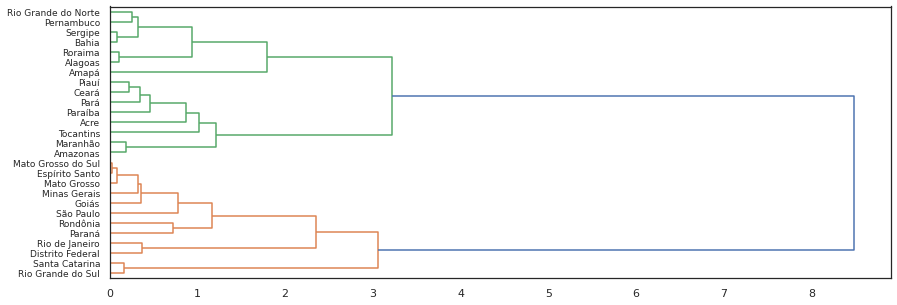

In [ ]:
import seaborn as sns
sns.set(style='white', rc={'figure.figsize':(14,5)})

dn = dendrogram(distancias,
                leaf_font_size=9,
                orientation='right',
                labels=df_scaled['estado'].values)

Analisando o dendograma podemos ver que se a distância variar de 4 a 8, a quantidade de grupos não varia, continuamos com 2 grupos. Isto indica que existem dois grupos bem distintos (distantes). Enquanto que se mudássemos nossa distância de 0.5 para 1, a quantidade grupos mudaria muito, indicando que vários desses grupos seriam muito similares (estariam muito próximos).

A conclusão é que a quantidade ideal de grupos deve estar associada à uma quantidade fixa de grupos para grandes variações da distância. Podemos analisar o dendograma para escolher a quantidade de grupos de acordo com o que precisamos, levando em consideração as similaridades entre os grupos.

Podemos também utilizar o dendograma e a função `fcluster` da biblioteca [SciPy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.fcluster.html) para automatizar esse processo.

In [ ]:
# importando a função fcluster
from scipy.cluster.hierarchy import fcluster

# distância máxima
max_d = 3

# obtendo grupos levando em consideração a distância
grupos = fcluster(distancias, t=max_d, criterion='distance')
grupos

array([3, 4, 4, 3, 4, 3, 2, 2, 2, 3, 2, 2, 2, 2, 3, 3, 4, 3, 4, 1, 2, 2,
       4, 1, 4, 2, 3], dtype=int32)

In [ ]:
# obtendo grupos levando em consideração a quantidade de grupos desejada
grupos = fcluster(distancias, t=2, criterion='maxclust')
grupos

array([2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 1, 2, 1, 2], dtype=int32)

Vamos fazer um comparativo dos grupos obtidos através das duas técnicas (agrupamento hierárquico do algoritmo KMeans), representadas respectivamente pelo `dendrograma` e pelo `gráfico de dispersão`.

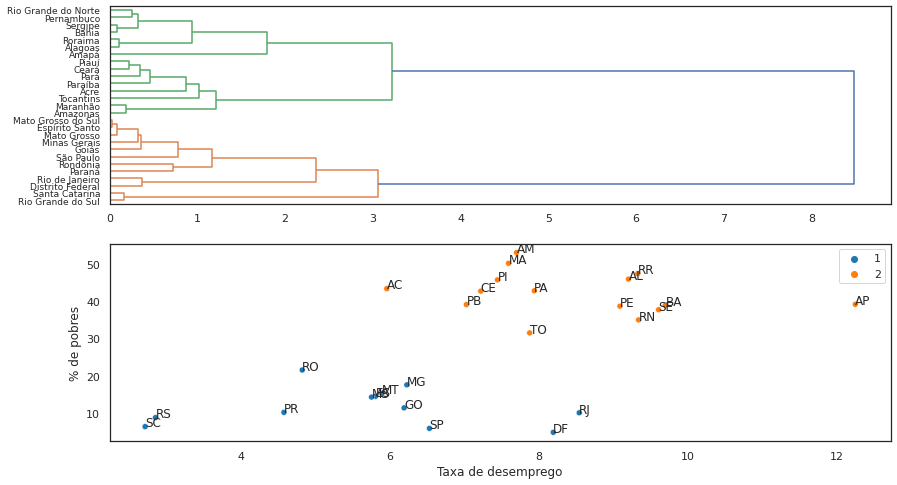

In [ ]:
# importando a biblioteca matplotlib
import matplotlib.pyplot as plt

sns.set(style='white', rc={'figure.figsize':(14,8)})
fig, axs = plt.subplots(ncols=1, nrows=2)

dn = dendrogram(distancias,
                leaf_rotation=0,
                leaf_font_size=9,
                orientation='right',
                labels=df_scaled['estado'].values,
                ax=axs[0])

# criando o gráfico de dispersão
sns.scatterplot(data=df2, x='Taxa de desemprego', y='% de pobres',
                hue=grupos, palette='tab10', ax=axs[1]);

# criando listas que serviram de apoio para anotar a sigla de cada estado no gráfico
desemp = df2['Taxa de desemprego']
pobres = df2['% de pobres']
estados = ['AC','AL','AP','AM','BA','CE','DF','ES','GO','MA','MT','MS','MG',
           'PR','PB','PA','PE','PI','RN','RS','RJ','RO','RR','SC','SE','SP','TO']

# anotando os 'nomes' de cada ponto
for i, estado in enumerate(estados):
    plt.annotate(estado, (desemp[i], pobres[i]) );

Podemos ver que obtivemos os mesmo grupos, de forma que não parece haver vantagem em usar o agrupamento hierárquico ou o KMeans. Mas, e se tivéssemos 4 grupos?

Outra pergunta que poderíamos nos fazer é: quais grupos são mais similares entre si?

Agora fica mais difícil responder isso apenas com base no gráfico de dispersão e na separação do KMeans, mas podemos ter uma ideia dessa similaridade observando o dendrograma.

Também ficaria difícil visualizar essas relações se tivéssemos mais de 2 variáveis, pois teríamos que visualizar a dispersão dos pontos em um espaço multidimensional.

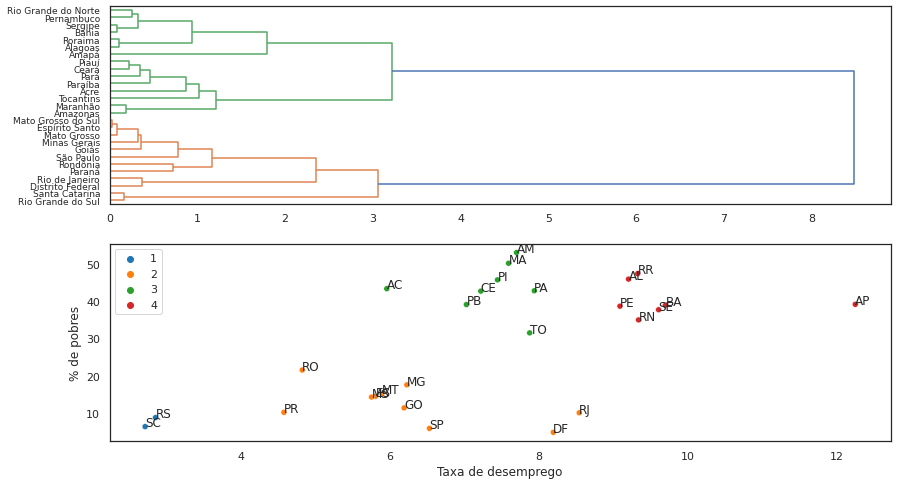

In [ ]:
grupos = fcluster(distancias, t=4, criterion='maxclust')

sns.set(style='white', rc={'figure.figsize':(14,8)})
fig, axs = plt.subplots(ncols=1, nrows=2)

dn = dendrogram(distancias,
                leaf_rotation=0,
                leaf_font_size=9,
                orientation='right',
                labels=df_scaled['estado'].values,
                ax=axs[0])

# criando o gráfico de dispersão
sns.scatterplot(data=df2, x='Taxa de desemprego', y='% de pobres',
                hue=grupos, palette='tab10', ax=axs[1]);

# criando listas que serviram de apoio para anotar a sigla de cada estado no gráfico
desemp = df2['Taxa de desemprego']
pobres = df2['% de pobres']
estados = ['AC','AL','AP','AM','BA','CE','DF','ES','GO','MA','MT','MS','MG',
           'PR','PB','PA','PE','PI','RN','RS','RJ','RO','RR','SC','SE','SP','TO']

# importando a biblioteca matplotlib
import matplotlib.pyplot as plt

# anotando os 'nomes' de cada ponto
for i, estado in enumerate(estados):
    plt.annotate(estado, (desemp[i], pobres[i]) );

## Análise dos Grupos

Vamos agrupar os dados por grupos e entender melhor como são as características de cada grupo, a fim de identificar e entender melhor cada grupo.

In [ ]:
# adicionando a coluna com os grupos
df2['grupo'] = grupos
df2.head()

,estado,PIB Municipal,% de pobres,IDH,Média Salarial,Taxa de desemprego,grupo
0,Acre,3.795693e+08,43.369091,0.767273,931.031818,5.955000,3
1,Alagoas,2.660082e+08,45.935490,0.739706,874.946373,9.200196,4
2,Amapá,5.154880e+08,39.180625,0.783750,1239.088750,12.243125,4
3,Amazonas,9.820415e+08,53.020161,0.765968,2097.015484,7.696452,3
4,Bahia,3.701926e+08,38.945468,0.760168,865.359856,9.694556,4


Podemos ver que o PIB municipal do grupo 0 é bem maior que dos demais; a porcentagem de pobres do grupo 3 é muito menor que nos demais; o IDH é relativamente comparavável entre os grupos, assim como a média salarial; e a taxa de desemprego é bem menor no grupo 3. 

In [ ]:
# separando os grupos
grupo1 = df2[df2['grupo'] == 1]
grupo2 = df2[df2['grupo'] == 2]
grupo3 = df2[df2['grupo'] == 3]
grupo4 = df2[df2['grupo'] == 4]

In [ ]:
# estatísticas descritivas do grupo 1
grupo1.describe()

,PIB Municipal,% de pobres,IDH,Média Salarial,Taxa de desemprego,grupo
count,2.000000e+00,2.000000,2.000000,2.000000,2.000000,2.0
mean,5.054330e+08,7.664634,0.844191,1033.172586,2.781188,1.0
std,2.704688e+07,1.705444,0.004644,20.331023,0.099082,0.0
min,4.863080e+08,6.458703,0.840907,1018.796382,2.711126,1.0
25%,4.958705e+08,7.061668,0.842549,1025.984484,2.746157,1.0
50%,5.054330e+08,7.664634,0.844191,1033.172586,2.781188,1.0
75%,5.149955e+08,8.267599,0.845833,1040.360688,2.816219,1.0
max,5.245580e+08,8.870565,0.847474,1047.548790,2.851250,1.0


In [ ]:
# características do grupo 1
grupo1_lista = ['75% possui menos de 4.4e08',
                '75% possui menos de 15%',
                '75% possui mais de 6.4']

In [ ]:
# estatísticas descritivas do grupo 2
grupo2.describe()

,PIB Municipal,% de pobres,IDH,Média Salarial,Taxa de desemprego,grupo
count,1.000000e+01,10.000000,10.000000,10.000000,10.000000,10.0
mean,1.554446e+10,12.627916,0.824875,1077.867456,6.250555,2.0
std,4.535742e+10,5.119319,0.020049,280.345652,1.269751,0.0
min,4.015928e+08,4.930000,0.788654,850.788253,4.574436,2.0
25%,4.406404e+08,10.184277,0.818793,937.869303,5.763974,2.0
50%,5.854940e+08,12.913940,0.823013,988.586537,6.038288,2.0
75%,1.779841e+09,15.131804,0.825993,1084.958528,6.452164,2.0
max,1.445732e+11,21.599231,0.870000,1814.710000,8.537717,2.0


In [ ]:
# características do grupo 2
grupo2_lista = ['75% possui menos de 4.8e08',
                '75% possui mais de 38%',
                '75% possui mais de 9.3']

In [ ]:
# estatísticas descritivas do grupo 3
grupo3.describe()

,PIB Municipal,% de pobres,IDH,Média Salarial,Taxa de desemprego,grupo
count,8.000000e+00,8.000000,8.000000,8.000000,8.000000,8.0
mean,3.690005e+08,43.556752,0.763382,1021.862537,7.341265,3.0
std,3.002107e+08,6.584739,0.015130,438.376759,0.640475,0.0
min,9.940348e+07,31.538705,0.740876,780.787609,5.955000,3.0
25%,1.422501e+08,41.812808,0.754843,833.727375,7.168266,3.0
50%,2.966414e+08,43.087867,0.763799,870.014614,7.515262,3.0
75%,4.679759e+08,46.833433,0.769073,939.720752,7.740576,3.0
max,9.820415e+08,53.020161,0.790288,2097.015484,7.935175,3.0


In [ ]:
# características do grupo 3
grupo3_lista = ['75% possui menos de 4.7e08',
                '75% possui mais de 41.8%',
                '75% possui mais de 7.2']

In [ ]:
# estatísticas descritivas do grupo 4
grupo4.describe()

,PIB Municipal,% de pobres,IDH,Média Salarial,Taxa de desemprego,grupo
count,7.000000e+00,7.000000,7.000000,7.000000,7.000000,7.0
mean,3.840045e+08,40.416165,0.765439,953.504894,9.783503,4.0
std,1.181913e+08,4.520156,0.019592,148.525040,1.105412,0.0
min,2.166574e+08,35.010299,0.739706,819.038054,9.084432,4.0
25%,3.090474e+08,38.211303,0.756243,858.062473,9.262098,4.0
50%,3.701926e+08,38.945468,0.760168,874.946373,9.334611,4.0
75%,4.788124e+08,42.558058,0.773522,1012.668067,9.649078,4.0
max,5.254619e+08,47.418667,0.798667,1239.088750,12.243125,4.0


In [ ]:
# características do grupo 4
grupo4_lista = ['75% mais de 5e08',
                '75% possui menos de 8.3%',
                '75% possui menos de 2.8']

In [ ]:
dicio_grupos = {'grupo 1':grupo1_lista,
                'grupo 2':grupo2_lista,
                'grupo 3':grupo3_lista,
                'grupo 4':grupo4_lista}

In [ ]:
personas = pd.DataFrame(dicio_grupos, index=['PIB Municipal','% de pobres','Taxa desemprego'])
personas

,grupo 1,grupo 2,grupo 3,grupo 4
PIB Municipal,75% possui menos de 4.4e08,75% possui menos de 4.8e08,75% possui menos de 4.7e08,75% mais de 5e08
% de pobres,75% possui menos de 15%,75% possui mais de 38%,75% possui mais de 41.8%,75% possui menos de 8.3%
Taxa desemprego,75% possui mais de 6.4,75% possui mais de 9.3,75% possui mais de 7.2,75% possui menos de 2.8


Uma maneira mais interessante de ver as características do grupos é através do boxplot.

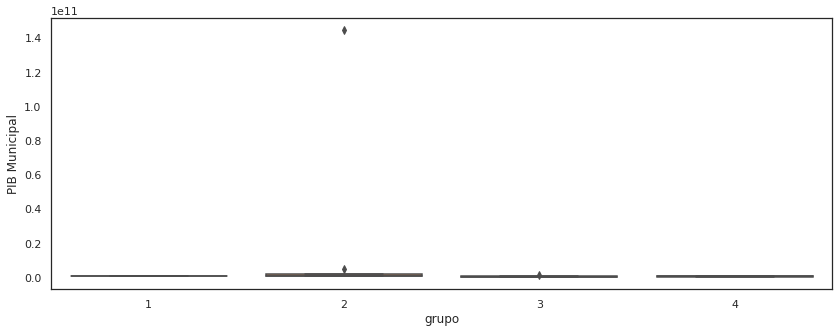

In [ ]:
sns.set(style='white', rc={'figure.figsize':(14,5)})

# boxplot da variável PIB Minucipal
sns.boxplot(data=df2, x='grupo', y='PIB Municipal');

Podemos ver que há um outlier no grupo 2, atrapalhando o entendimento deste e dos demasi grupos, vamos identificá-lo e removê-lo.

In [ ]:
# observado o DataFrame
df2

,estado,PIB Municipal,% de pobres,IDH,Média Salarial,Taxa de desemprego,grupo
0,Acre,3.795693e+08,43.369091,0.767273,931.031818,5.955000,3
1,Alagoas,2.660082e+08,45.935490,0.739706,874.946373,9.200196,4
2,Amapá,5.154880e+08,39.180625,0.783750,1239.088750,12.243125,4
3,Amazonas,9.820415e+08,53.020161,0.765968,2097.015484,7.696452,3
4,Bahia,3.701926e+08,38.945468,0.760168,865.359856,9.694556,4
5,Ceará,4.314891e+08,42.712772,0.761630,780.787609,7.216522,3
6,Distrito Federal,1.445732e+11,4.930000,0.870000,1814.710000,8.190000,2
7,Espírito Santo,1.095770e+09,14.555513,0.826026,932.606923,5.803590,2
8,Goiás,4.339869e+08,11.468008,0.825894,977.789228,6.186789,2
9,Maranhão,2.137135e+08,50.173733,0.740876,822.918157,7.589631,3


Olhando a coluna PIB Municipal, podemos ver que o Distrito Federal tem uma valor muito maior que os demais, e portanto este é o outlier que aparece no boxplot.

In [ ]:
# removendo o outlier
df2.drop([6], axis=0, inplace=True)
df2

,estado,PIB Municipal,% de pobres,IDH,Média Salarial,Taxa de desemprego,grupo
0,Acre,3.795693e+08,43.369091,0.767273,931.031818,5.955000,3
1,Alagoas,2.660082e+08,45.935490,0.739706,874.946373,9.200196,4
2,Amapá,5.154880e+08,39.180625,0.783750,1239.088750,12.243125,4
3,Amazonas,9.820415e+08,53.020161,0.765968,2097.015484,7.696452,3
4,Bahia,3.701926e+08,38.945468,0.760168,865.359856,9.694556,4
5,Ceará,4.314891e+08,42.712772,0.761630,780.787609,7.216522,3
7,Espírito Santo,1.095770e+09,14.555513,0.826026,932.606923,5.803590,2
8,Goiás,4.339869e+08,11.468008,0.825894,977.789228,6.186789,2
9,Maranhão,2.137135e+08,50.173733,0.740876,822.918157,7.589631,3
10,Mato Grosso,4.015928e+08,15.323901,0.818014,1057.257589,5.889787,2


Podemos observar que o índice 6 não está mais presente. Agora podemos refazer o boxplot para ter melhor entendimento da variável.

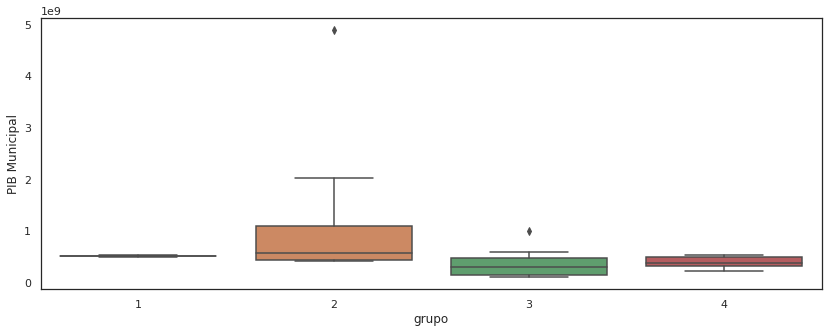

In [ ]:
# boxplot da variável PIB Minucipal
sns.boxplot(data=df2, x='grupo', y='PIB Municipal');

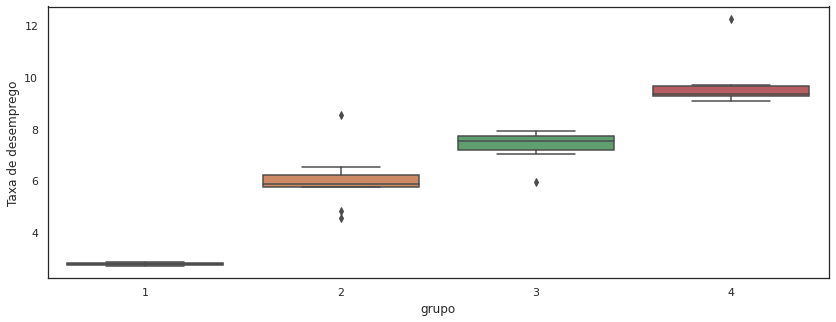

In [ ]:
# boxplot da variável Taxa de desemprego
sns.boxplot(data=df2, x='grupo', y='Taxa de desemprego');

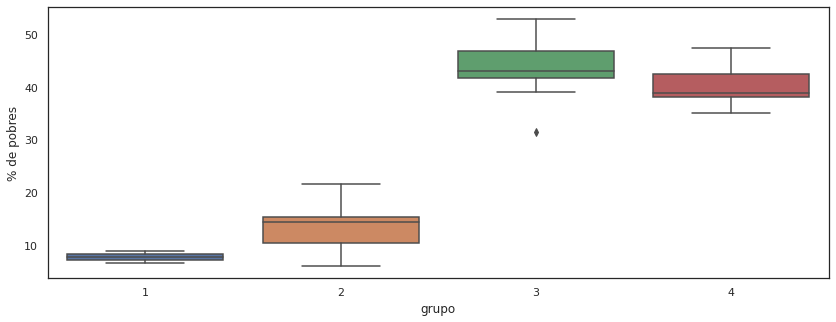

In [ ]:
# boxplot da variável '% de pobres'
sns.boxplot(data=df2, x='grupo', y='% de pobres');

Podemos então considerar que:

* O grupo 1 é o grupo que apresenta PIB municipal baixo, baixa taxa de desemprego e baixa porcentagem de pobres (Estados pobres com população rica e empregada).

* O grupo 2 é o grupo que possui PIB municipal pouco mais elevado (apesar do outlier) baixa porcentagem de pobres e moderada taxa de desemprego. (Estados ricos com alto emprego e população rica)

* O grupo 3 é o grupo e o grupo que apresenta PIB municipal moderado, taxa de desemprego moderada e alta porcentagem de pobres. (Estados com moderado desemprego e população pobre)

* O grupo 4 é o grupo que apresenta maior taxa de desemprego, alta porcentagem de pobres e baixo PIB municipal. (Estados pobres com alto desemprego e população pobre)

A análise acima pode ser mais interessante do que a tabela `personas`, embora as duas sejam complementares. Pode-se perceber que o grupo 1 é formado por estados pobres cuja população é rica; o grupo 2 é composto por estados ricos em que a população empregada ganha melhor; o grupo 3 é estados nem ricos nem pobres com população pobre; o grupo 4 é composto por estados pobres com população ganhando mal.


Essa identificação seria muito importante para nortear programas governamentais.